In [ ]:
pip install faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 31.3 MB/s eta 0:00:00


In [ ]:
from transformers import DPRContextEncoder, DPRContextEncoderTokenizer
import torch

import numpy as np
import random
from transformers import DPRQuestionEncoder, DPRQuestionEncoderTokenizer
from transformers import AutoTokenizer, AutoModelForCausalLM


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import numpy as np
import re

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [ ]:
def tsne_plot(data):
    # Apply t-SNE to reduce to 3D
    tsne = TSNE(n_components=3, random_state=42,perplexity=data.shape[0]-1)
    data_3d = tsne.fit_transform(data)

    # Plotting
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Assign colors for each point based on its index
    num_points = len(data_3d)
    colors = plt.cm.tab20(np.linspace(0, 1, num_points))

    # Plot scatter with unique colors for each point
    for idx, point in enumerate(data_3d):
        ax.scatter(point[0], point[1], point[2], label=str(idx))

    # Adding labels and titles
    ax.set_xlabel('TSNE Component 1')
    ax.set_ylabel('TSNE Component 2')
    ax.set_zlabel('TSNE Component 3')
    plt.title('3D t-SNE Visualization')
    plt.legend(title='Input Order')
    plt.show()

In [ ]:
def preprocess_document(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Remove excessive newlines
    content = re.sub(r'\n\s*\n+', '\n', content)

    # Regular expression to find headings
    heading_pattern = r'(?<=\n)\s*[A-Z][A-Za-z\s]*[A-Za-z](?=\n)'
    headings = re.findall(heading_pattern, content)

    # Split content into sections based on headings
    sections = re.split(heading_pattern, content)

    # Pair each heading with its corresponding section content
    formatted_document = []
    for i in range(1, len(sections)):
        doc_heading = headings[i - 1].strip()
        doc_details = sections[i].strip()
        formatted_document.append(f"{doc_heading}\n{doc_details}")

    return formatted_document

In [ ]:
path = '/content/Sample-Company-Policy.txt'
formatted_document = preprocess_document(path)

In [ ]:
formatted_document[:5]

['Welcome\nHello and welcome! Thank you for joining [Company name], where we strive to [state mission statement or values.] We can’t wait to see what you will achieve with us.\nThis employee handbook defines who we are and how we work together. we will do everything possible to create a fair and productive workplace, but we need your help. We’ve created this handbook to guide you.\nThis handbook isn’t a contract or a guarantee of employment. It’s a collection of our expectations, commitments and responsibilities. Please read this employee handbook carefully and consult it whenever you need to.',
 'Getting to know our company\n[Provide a brief history of your company here. If possible, use illustrations and charts to make this information memorable. Present your company’s culture and vision. Avoid jargon and overused phrases (e.g. “competitive,” “fast-paced environment,” “core values” and “innovative.”) Also, it’d be a good idea to include quotes and pictures of your company’s founders,

In [ ]:
context_encoder = DPRContextEncoder.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')
context_tokenizer = DPRContextEncoderTokenizer.from_pretrained('facebook/dpr-ctx_encoder-single-nq-base')

config.json:   0%|          | 0.00/492 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.bias', 'ctx_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRContextEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRContextEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRContextEncoderTokenizer'.


In [ ]:
#shuffling samples so that the samples are not ordered based on the category they belong to
random.shuffle(formatted_document)
tokens=context_tokenizer( formatted_document[:10], return_tensors='pt', padding=True, truncation=True, max_length=512)
print("tokens")
print(tokens)
outputs=context_encoder(**tokens)
print("Context encoder")
print(outputs.pooler_output)

tokens
{'input_ids': tensor([[  101, 13436,  2065,  ...,     0,     0,     0],
        [  101,  5971, 10373,  ...,     0,     0,     0],
        [  101, 16011,  1998,  ...,     0,     0,     0],
        ...,
        [  101,  7904,  3642,  ...,     0,     0,     0],
        [  101,  8172,  2017,  ...,     0,     0,     0],
        [  101,  5305,  2681,  ...,  1012,  1033,   102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]])}
Context encoder
tensor([[ 1.7697e-01,  3.0472e-01,  1.1401e-01,  ..., -8.8853e-01,
         -9.3502e-01, -4.5227e-01],
        [ 1.0231e+00,  

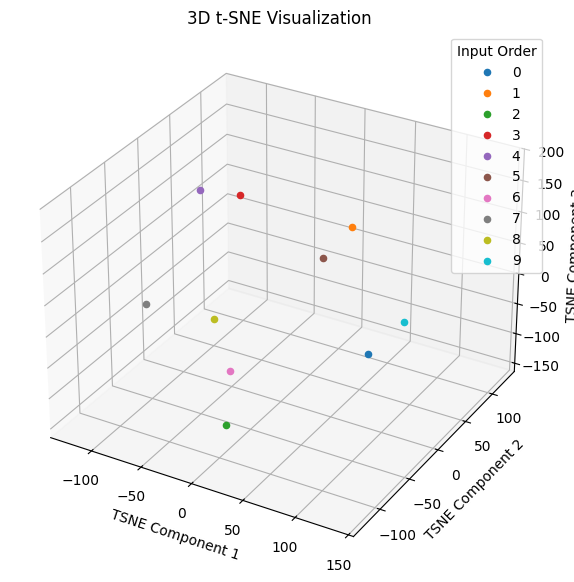

In [ ]:
tsne_plot(outputs.pooler_output.detach().numpy())

In [ ]:
len(formatted_document)

78

In [ ]:
def encode_contexts(text_list):
    # Encode a list of texts into embeddings
    embeddings = []
    for text in text_list:
        inputs = context_tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=256)
        outputs = context_encoder(**inputs)
        embeddings.append(outputs.pooler_output)
    return torch.cat(embeddings).detach().numpy()

# you would now encode these paragraphs to create embeddings.
context_embeddings = encode_contexts(formatted_document)

In [ ]:
context_embeddings.shape

(78, 768)

In [ ]:
import faiss

# Convert list of numpy arrays into a single numpy array
embedding_dim = 768  # This should match the dimension of your embeddings
context_embeddings_np = np.array(context_embeddings).astype('float32')

# Create a FAISS index for the embeddings
index = faiss.IndexFlatL2(embedding_dim)
index.add(context_embeddings_np)  # Add the context embeddings to the index

In [ ]:
# Load DPR question encoder and tokenizer
question_encoder = DPRQuestionEncoder.from_pretrained('facebook/dpr-question_encoder-single-nq-base')
question_tokenizer = DPRQuestionEncoderTokenizer.from_pretrained('facebook/dpr-question_encoder-single-nq-base')

config.json:   0%|          | 0.00/493 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/dpr-question_encoder-single-nq-base were not used when initializing DPRQuestionEncoder: ['question_encoder.bert_model.pooler.dense.bias', 'question_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRQuestionEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRQuestionEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def search_relevant_contexts(question, question_tokenizer, question_encoder, index, k=5):
    """
    Searches for the most relevant contexts to a given question.

    Returns:
    tuple: Distances and indices of the top k relevant contexts.
    """
    # Tokenize the question
    question_inputs = question_tokenizer(question, return_tensors='pt')

    # Encode the question to get the embedding
    question_embedding = question_encoder(**question_inputs).pooler_output.detach().numpy()

    # Search the index to retrieve top k relevant contexts
    D, I = index.search(question_embedding, k)

    return D, I

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")
model.generation_config.pad_token_id = tokenizer.pad_token_id

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
def generate_answer_without_context(question):
    # Tokenize the input question
    inputs = tokenizer(question, return_tensors='pt', max_length=1024, truncation=True)

    # Generate output directly from the question without additional context
    summary_ids = model.generate(inputs['input_ids'], max_length=150, min_length=40, length_penalty=2.0,
                                 num_beams=4, early_stopping=True,pad_token_id=tokenizer.eos_token_id)

    # Decode and return the generated text
    answer = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return answer

In [ ]:
question = "what is Referrals policy?"
answer = generate_answer_without_context(question)

print("Answer:", answer)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Answer: what is Referrals policy?

Referrals is a service that allows you to make referrals to people you know. Referrals is a service that allows you to make referrals to people you know. Referrals is a service that allows you to make referrals to people you know. Referrals is a service that allows you to make referrals to people you know. Referrals is a service that allows you to make referrals to people you know. Referrals is a service that allows you to make referrals to people you know.


In [ ]:
def generate_answer(question, contexts):
    # Concatenate the retrieved contexts to form the input to GPT2
    input_text = question + ' ' + ' '.join(contexts)
    # print(input_text)

    # Truncate the input_text if it is too long
    max_length = 1024 - 50  # Leave some room for generated tokens

    # Check if the input text is longer than the maximum allowed length for the model
    if len(tokenizer.encode(input_text)) > max_length:
        # Find the closest whitespace before the maximum allowed length
        truncate_index = input_text.rfind(' ', 0, max_length)
        input_text = input_text[:truncate_index] + '...'  # Truncate and add ellipsis

    inputs = tokenizer(input_text, return_tensors='pt', max_length=1024, truncation=True)

    # Generate output using GPT2
    summary_ids = model.generate(inputs['input_ids'], max_new_tokens=50, min_length=40, length_penalty=2.0,
                                 num_beams=4, early_stopping=True,pad_token_id=tokenizer.eos_token_id)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [ ]:
question = "what is Referrals policy?"

_,I =search_relevant_contexts(question, question_tokenizer, question_encoder, index, k=5)

print(f"paragraphs indexs {I}")

paragraphs indexs [[35 10 25 62 37]]


In [ ]:
top_contexts = [formatted_document[idx] for idx in I[0]]
print(f"top_contexts {top_contexts}")

top_contexts ['Referrals\nIf you know someone who you think would be a good fit for a position at our company, feel free to refer them. If we end up hiring your referred candidate, you are eligible for [$3000] referral bonus or [a trip to a destination of your choice/ Amazon coupons.] Our employee referral rewards may be higher if we hire your referred candidate in a hard-to- fill role. For example, if we hire your referral for the position of [Data Scientist], you may receive [$6000.]\nAdditional rules for rewards:\n* We guarantee that every reward will be paid out within [a month] of the date we hired a candidate.\n* There is no cap on the number of referrals an employee can make. All rewards will be paid accordingly.\n* If two or more employees refer the same candidate, only the first referrer will receive the referral incentives.\n* Referrers are still eligible for rewards even if a candidate is hired at a later time or gets hired for another position.\nWho can be referred?\nWe hav

In [ ]:
# if len(top_contexts) > 800:
#   top_contexts = top_contexts[:800]
answer = generate_answer(question, top_contexts)
print("Generated Answer:", answer)

Token indices sequence length is longer than the specified maximum sequence length for this model (1028 > 1024). Running this sequence through the model will result in indexing errors


Generated Answer: what is Referrals policy? Referrals
If you know someone who you think would be a good fit for a position at our company, feel free to refer them. If we end up hiring your referred candidate, you are eligible for [$3000] referral bonus or [a trip to a destination of your choice/ Amazon coupons.] Our employee referral rewards may be higher if we hire your referred candidate in a hard-to- fill role. For example, if we hire your referral for the position of [Data Scientist], you may receive [$6000.]
Additional rules for rewards:
* We guarantee that every reward will be paid out within [a month] of the date we hired a candidate.
* There is no cap on the number of referrals an employee can make. All rewards will be paid accordingly.
* If two or more employees refer the same candidate, only the first referrer will receive the referral incentives.
* Referrers are still eligible for rewards even if a candidate is hired at a later time or gets hired for another...
If you have a

Using EleutherAI/gpt-neo-125M to generate answers..

In [ ]:
model_name = "EleutherAI/gpt-neo-125M"
tokenizer_EleutherAI = AutoTokenizer.from_pretrained(model_name)
model_EleutherAI = AutoModelForCausalLM.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/526M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

In [1]:
def generate_answer_model_EleutherAI(question, contexts):

    input_text = question + ' ' + ' '.join(contexts)
    # print(input_text)

    # Truncate the input_text if it is too long
    max_length = 1024 - 50  # Leave some room for generated tokens

    # Check if the input text is longer than the maximum allowed length for the model
    if len(tokenizer_EleutherAI.encode(input_text)) > max_length:
        # Find the closest whitespace before the maximum allowed length
        truncate_index = input_text.rfind(' ', 0, max_length)
        input_text = input_text[:truncate_index] + '...'  # Truncate and add ellipsis

    inputs = tokenizer_EleutherAI(input_text, return_tensors='pt', max_length=1024, truncation=True)


    summary_ids = model_EleutherAI.generate(inputs['input_ids'], max_new_tokens=50, min_length=40, length_penalty=2.0,
                                 num_beams=4, early_stopping=True,pad_token_id=tokenizer_EleutherAI.eos_token_id)
    return tokenizer_EleutherAI.decode(summary_ids[0], skip_special_tokens=True)


In [ ]:
question = "what is Referrals policy?"

_,I =search_relevant_contexts(question, question_tokenizer, question_encoder, index, k=5)

print(f"paragraphs indexs {I}")

paragraphs indexs [[13 51 41  4 40]]


In [ ]:
top_contexts = [formatted_document[idx] for idx in I[0]]
print(f"top_contexts {top_contexts}")

top_contexts ['Referrals\nIf you know someone who you think would be a good fit for a position at our company, feel free to refer them. If we end up hiring your referred candidate, you are eligible for [$3000] referral bonus or [a trip to a destination of your choice/ Amazon coupons.] Our employee referral rewards may be higher if we hire your referred candidate in a hard-to- fill role. For example, if we hire your referral for the position of [Data Scientist], you may receive [$6000.]\nAdditional rules for rewards:\n* We guarantee that every reward will be paid out within [a month] of the date we hired a candidate.\n* There is no cap on the number of referrals an employee can make. All rewards will be paid accordingly.\n* If two or more employees refer the same candidate, only the first referrer will receive the referral incentives.\n* Referrers are still eligible for rewards even if a candidate is hired at a later time or gets hired for another position.\nWho can be referred?\nWe hav

In [ ]:
answer = generate_answer_model_EleutherAI(question, top_contexts)
print("Generated Answer:", answer)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated Answer: what is Referrals policy? Referrals
If you know someone who you think would be a good fit for a position at our company, feel free to refer them. If we end up hiring your referred candidate, you are eligible for [$3000] referral bonus or [a trip to a destination of your choice/ Amazon coupons.] Our employee referral rewards may be higher if we hire your referred candidate in a hard-to- fill role. For example, if we hire your referral for the position of [Data Scientist], you may receive [$6000.]
Additional rules for rewards:
* We guarantee that every reward will be paid out within [a month] of the date we hired a candidate.
* There is no cap on the number of referrals an employee can make. All rewards will be paid accordingly.
* If two or more employees refer the same candidate, only the first referrer will receive the referral incentives.
* Referrers are still eligible for rewards even if a candidate is hired at a later time or gets hired for another...

A:

If you k